## Analyse : 
    - On recherche le meilleur dé pour chaque rank
    - On cherche la moyenne / médianne des dés par rank
    - On cherche le meilleur dé global
    - Le dé avec la variance la plus variée
    - le dé le plus "stable"
 
    
- PAR HEURE

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dice_data = pd.DataFrame(pd.read_csv("donnees_11_04_13h42.csv"))
dice_data.groupby('Nom_dé')['Résultat'].mean()

Nom_dé
base_dice         5.1675
normal_dice      10.3808
parabole_dice     5.2346
power_dice        7.3878
rank_dice         5.4723
scale_dice        9.0720
unscale_dice      8.6080
Name: Résultat, dtype: float64

In [5]:
moyenne_par_de_et_rank = dice_data.groupby(['Nom_dé', 'Rank'])['Résultat'].mean().unstack()
moyenne_par_de_et_rank

Rank,Bronze,Challenger,Diamond,Emerald,Gold,Grand Master,Iron,Master,Platinum,Silver
Nom_dé,,,,,,,,,,
base_dice,3.642,5.564,4.495,5.844,4.256,8.379,3.664,6.800,5.013,4.018
normal_dice,12.851,12.158,12.500,10.397,8.129,10.808,8.783,9.003,9.024,10.155
parabole_dice,8.601,8.247,4.482,0.000,0.340,6.131,9.532,7.354,2.890,4.769
power_dice,4.598,9.838,9.607,9.282,8.028,12.360,2.267,5.203,7.119,5.576
rank_dice,2.372,10.984,7.198,5.506,4.715,9.978,1.121,4.808,5.169,2.872
scale_dice,5.580,5.240,10.940,11.640,11.500,8.800,13.300,6.080,4.160,13.480
unscale_dice,4.280,9.080,16.620,9.200,5.320,10.540,0.000,8.400,8.920,13.720


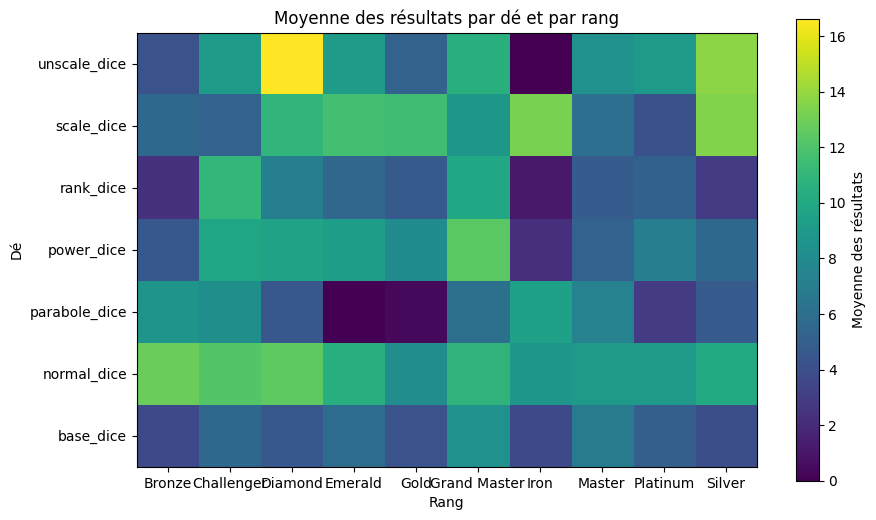

In [6]:
plt.figure(figsize=(10, 6))
plt.imshow(moyenne_par_de_et_rank, cmap='viridis', interpolation='nearest')

plt.colorbar(label='Moyenne des résultats')
plt.xlabel('Rang')
plt.ylabel('Dé')
plt.title('Moyenne des résultats par dé et par rang')


plt.xticks(range(len(moyenne_par_de_et_rank.columns)), moyenne_par_de_et_rank.columns)
plt.yticks(range(len(moyenne_par_de_et_rank.index)), moyenne_par_de_et_rank.index)
plt.gca().invert_yaxis() 
plt.show()

In [7]:
df = dice_data

nouveau_df = pd.DataFrame(columns=df['Nom_dé'].unique())

for nom_de in nouveau_df.columns:
    resultat_de = df.loc[df['Nom_dé'] == nom_de, 'Résultat']
    nouveau_df[nom_de] = resultat_de.values

print(nouveau_df)

      base_dice  normal_dice  parabole_dice  power_dice  rank_dice  \
0             5            6             19           3          2   
1             5            6             19           3          2   
2             5            6             11           3          2   
3             5            6             11           3          2   
4             5            6             11           3          2   
...         ...          ...            ...         ...        ...   
9995          1            9              0           4          2   
9996          1            9              0           4          2   
9997          1            9              0           4          2   
9998          1            9              0           4          2   
9999          1            9              0           4          2   

      scale_dice  unscale_dice  
0              0             0  
1              0             0  
2              0             0  
3              0           

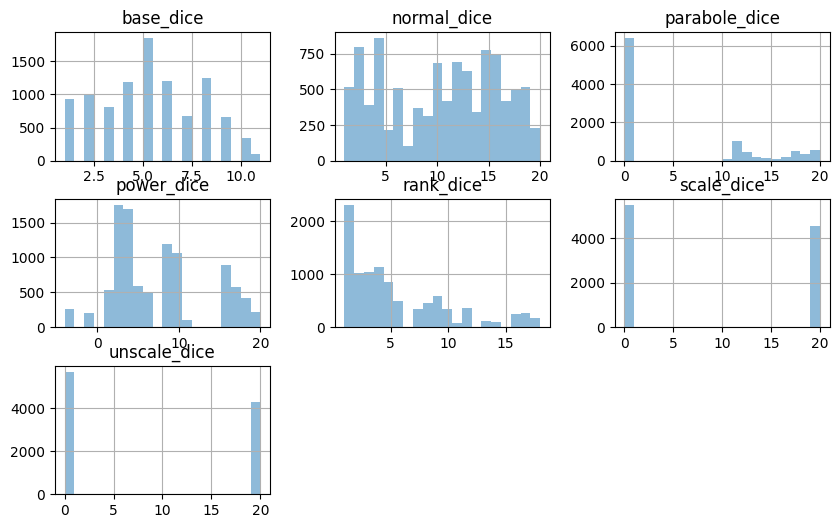

In [8]:
nouveau_df.hist(figsize=(10, 6), bins=20, alpha=0.5)
plt.title('Histogramme des résultats de chaque dé')
plt.xlabel('Résultat')
plt.ylabel('Fréquence')
plt.legend(nouveau_df.columns)
plt.grid(False)
plt.show()

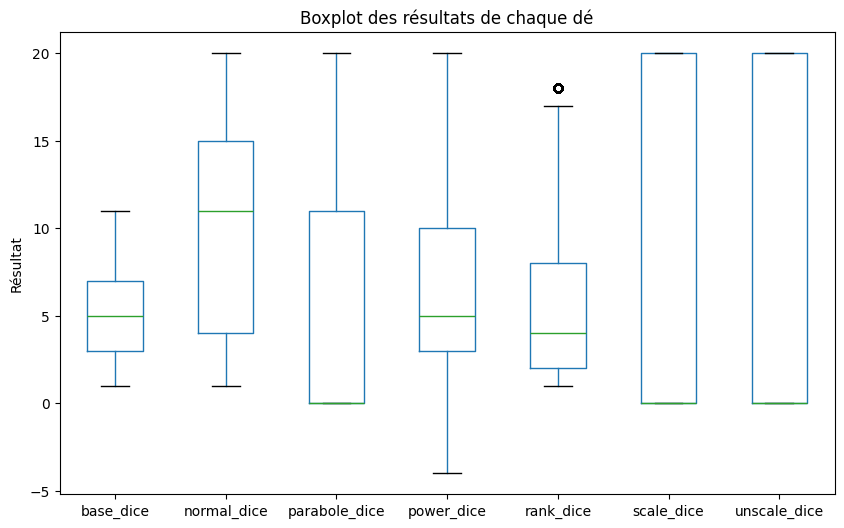

In [9]:
nouveau_df.boxplot(figsize=(10, 6))
plt.title('Boxplot des résultats de chaque dé')
plt.ylabel('Résultat')
plt.grid(False)
plt.show()

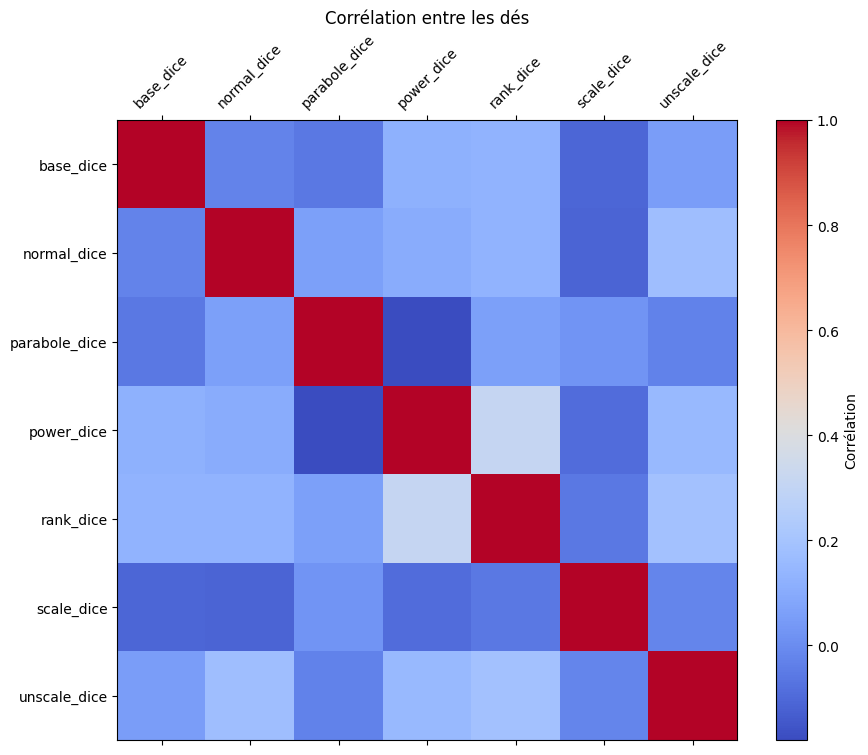

In [10]:
correlation = nouveau_df.corr()
plt.figure(figsize=(10, 8))
plt.matshow(correlation, cmap='coolwarm', fignum=1)
plt.colorbar(label='Corrélation')
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title('Corrélation entre les dés')
plt.show()

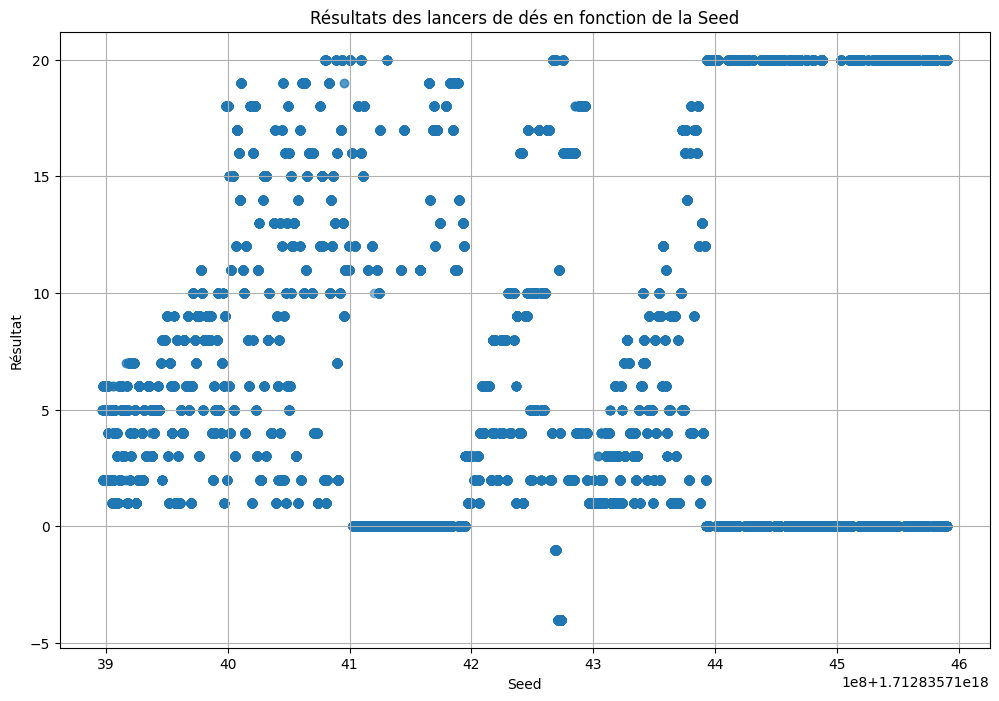

In [11]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Seed'], df['Résultat'], alpha=0.5)
plt.title('Résultats des lancers de dés en fonction de la Seed')
plt.xlabel('Seed')
plt.ylabel('Résultat')
plt.grid(True)
plt.show()